In [1]:
import time
import numpy as np
import pandas as pd
import hist as hist2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep

## TEST TRAINING

In [21]:
! ls ./ParticleNet_model

best_epoch.json        epoch_0_weights.pth    model_kwargs.pkl
best_epoch_weights.pth hyperparameters.json   training_plots


In [69]:
import pickle as pkl
import sys
sys.path.insert(0,'..')
from particlenet import ParticleNet
import torch
import torch.nn as nn
from torch_geometric.loader import DataListLoader, DataLoader

test_data = torch.load("../data/toptagging/test/processed/data_0.pt")
loader = DataLoader(test_data, batch_size=4, shuffle=True)

In [89]:
# load the trained model
device = 'cpu'
PATH = "ParticleNet_model"
with open(f"{PATH}/model_kwargs.pkl", "rb") as f:
    model_kwargs = pkl.load(f)

state_dict = torch.load(f"{PATH}/best_epoch_weights.pth", map_location=device)

model = ParticleNet(**model_kwargs)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [90]:
sig = nn.Sigmoid()

y_score = None
y_test = None
for i, batch in enumerate(loader):
    preds, _, _, _ = model(batch)
    preds = sig(preds).detach()
    
    if y_score == None:
        y_score = preds[:].reshape(-1)
        y_test = batch.y
    else:
        y_score = torch.cat([y_score, preds[:].reshape(-1)])
        y_test = torch.cat([y_test, batch.y]) 
        
    if i==100:
        break

In [72]:
y_score

tensor([0.4577, 0.2810, 0.4424, 0.4525, 0.4061, 0.4138, 0.4790, 0.4636, 0.4040,
        0.4537, 0.4819, 0.4159, 0.4232, 0.3066, 0.4797, 0.3943, 0.4534, 0.2770,
        0.4663, 0.4073, 0.4204, 0.3408, 0.4695, 0.4494, 0.4920, 0.4571, 0.3517,
        0.4316, 0.4553, 0.4612, 0.3906, 0.4396, 0.4138, 0.4382, 0.4466, 0.4483,
        0.4577, 0.4664, 0.4409, 0.3788, 0.4423, 0.4618, 0.4228, 0.4153, 0.3859,
        0.4578, 0.4555, 0.4538, 0.4253, 0.4651, 0.4269, 0.4370, 0.4552, 0.4118,
        0.4324, 0.4532, 0.4579, 0.4411, 0.3957, 0.4084, 0.4614, 0.4056, 0.3954,
        0.4719, 0.4693, 0.3218, 0.4539, 0.4499, 0.4544, 0.4206, 0.4250, 0.4519,
        0.4567, 0.4321, 0.3920, 0.4520, 0.4239, 0.4457, 0.4408, 0.4379, 0.4482,
        0.3820, 0.4468, 0.4492, 0.4274, 0.4373, 0.4584, 0.4269, 0.4220, 0.4134,
        0.4261, 0.4767, 0.4164, 0.4501, 0.4369, 0.4442, 0.4607, 0.4336, 0.4451,
        0.3665, 0.4373, 0.3857, 0.4753, 0.4106, 0.4432, 0.4679, 0.3915, 0.4260,
        0.4466, 0.4599, 0.3174, 0.4452, 

In [73]:
y_test

tensor([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,

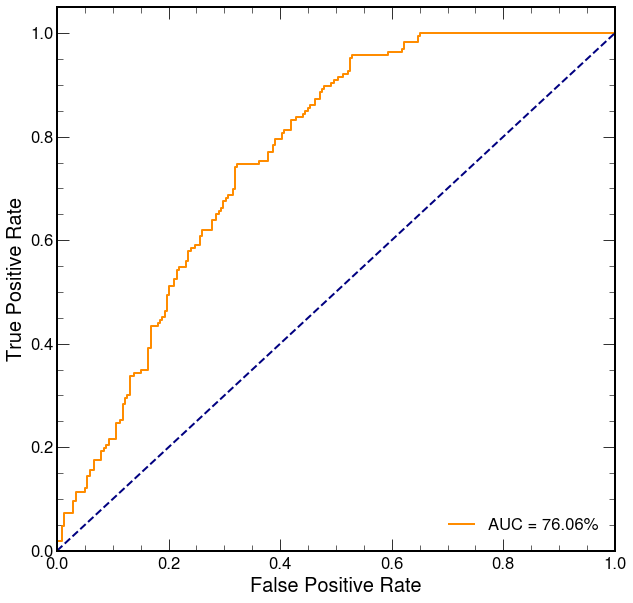

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
%matplotlib inline

import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams.update({'font.size': 20})

# Compute ROC curve and ROC area for each class    
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots()
ax.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=2,
    label=f"AUC = {round(auc(fpr, tpr)*100,2)}%",
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("")
plt.legend(loc="lower right")
plt.show()

In [93]:
! ls ParticleNet_model

best_epoch.json        hyperparameters.json   model_kwargs.pkl
best_epoch_weights.pth loss_2_train.pkl       training_plots
epoch_0_weights.pth    loss_2_valid.pkl


In [97]:
with open('ParticleNet_model/loss_2_train.pkl', 'rb') as f:
    losses_train = pkl.load(f)

In [98]:
with open('ParticleNet_model/loss_2_valid.pkl', 'rb') as f:
    losses_valid = pkl.load(f)

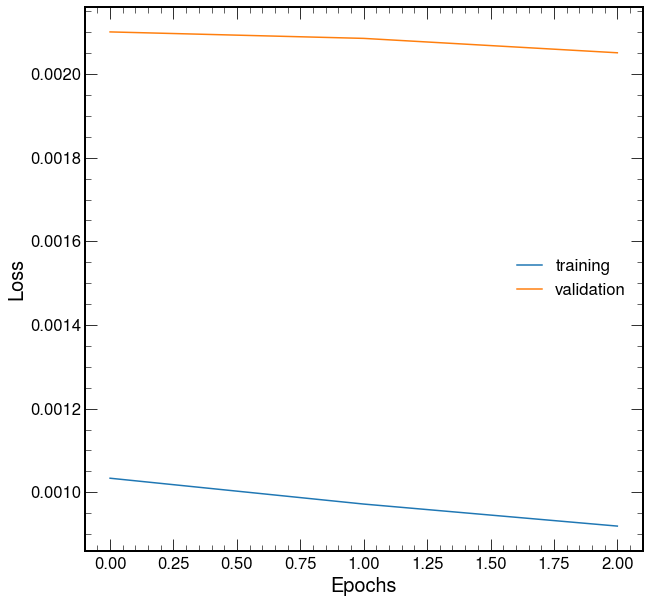

In [101]:
        # make loss plots
        fig, ax = plt.subplots()
        ax.plot(range(len(losses_train)), losses_train, label="training")
        ax.plot(range(len(losses_valid)), losses_valid, label="validation")
        ax.set_xlabel("Epochs")
        ax.set_ylabel("Loss")
        ax.legend(loc="best")


## TEST LRP

In [2]:
! ls

R_edges.pkl       __pycache__       edge_index.pkl
Rscores.pkl       batch_x.pkl       particlenet.ipynb


In [3]:
import pickle as pkl

with open('batch_x.pkl', 'rb') as handle:
    batch_x = pkl.load(handle)
with open('Rscores.pkl', 'rb') as handle:
    Rscores = pkl.load(handle).detach()
with open('R_edges.pkl', 'rb') as handle:
    R_edges = pkl.load(handle)    
with open('edge_index.pkl', 'rb') as handle:
    edge_index_dic = pkl.load(handle)

In [4]:
edge_index_dic.keys()

dict_keys(['edge_conv_0', 'edge_conv_1', 'edge_conv_2'])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/fmokhtar/Desktop/xai/edge_conv_0.pdf'

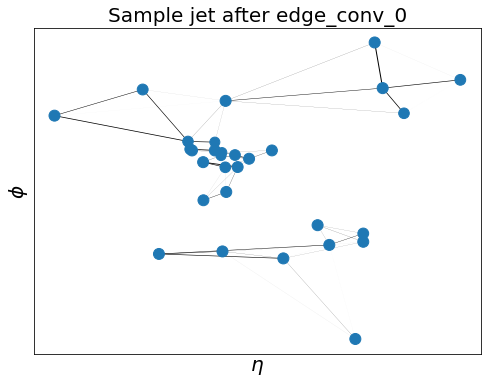

In [5]:
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
import networkx as nx
import torch
import torch_geometric
import numpy as np

num_nodes = len(Rscores)

# Get positions of nodes in the graph
# recall: Features, in order: [eta, phi, pt, mask].
eta = batch_x[:, 0]
phi = batch_x[:, 1]
pt = np.abs(batch_x[:, 2])

eta_phi = batch_x[:, :2]

pos = {}
for node_i in range(num_nodes):
    pos[node_i] = eta_phi.numpy()[node_i]

to_undirected = True
for edgeconv in ['edge_conv_0', 'edge_conv_1', 'edge_conv_2']:
    # if directed
    if to_undirected == False:
        edge_index, edge_weight = edge_index_dic[edgeconv].detach(), torch.abs(R_edges[edgeconv]).sum(axis=1).detach()

    # if undirected
    else:
        edge_index, edge_weight = torch_geometric.utils.to_undirected(edge_index_dic[edgeconv].detach(), torch.abs(R_edges[edgeconv].detach()).sum(axis=1))

    data = torch_geometric.data.Data(edge_index=edge_index, edge_weight=edge_weight, num_nodes=num_nodes)
    G = torch_geometric.utils.to_networkx(data, to_undirected=to_undirected)

    fig, ax = plt.subplots(figsize=(8, 6))
    nx.draw_networkx(G, pos, node_size=250*pt, with_labels=False, width=edge_weight/edge_weight.max(), ax=ax)   
    ax.set_xlabel(r"$\eta$", fontsize=20)
    ax.set_ylabel(r"$\phi$", fontsize=20);
    ax.set_title(f'Sample jet after {edgeconv}', fontsize=20);
    plt.savefig(f'/Users/fmokhtar/Desktop/xai/{edgeconv}.pdf')

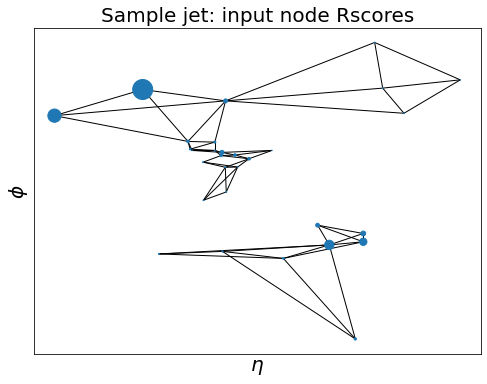

In [247]:
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
import networkx as nx
import torch
import torch_geometric
import numpy as np

to_undirected = True
# if directed
if to_undirected == False:
    edge_index, edge_weight = edge_index_dic['edge_conv_0'].detach()

# if undirected
else:
    edge_index = torch_geometric.utils.to_undirected(edge_index_dic['edge_conv_0'].detach())

data = torch_geometric.data.Data(edge_index=edge_index, num_nodes=num_nodes)
G = torch_geometric.utils.to_networkx(data, to_undirected=to_undirected)

fig, ax = plt.subplots(figsize=(8, 6))
nx.draw_networkx(G, pos, node_size=400*torch.abs(Rscores).sum(axis=1)/torch.abs(Rscores).sum(axis=1).max(), with_labels=False, ax=ax)   
ax.set_xlabel(r"$\eta$", fontsize=20)
ax.set_ylabel(r"$\phi$", fontsize=20);
ax.set_title(f'Sample jet: input node Rscores', fontsize=20);